In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import FontManager
from highlight_text import fig_text, ax_text
import matplotlib.patheffects as path_effects
import math
import matplotlib.colors as mcolors
from matplotlib import cm
import matplotlib.ticker as ticker
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
from PIL import Image

In [2]:
URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)
URL4 = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL4)

def path_logo():
    return '/Users/Federico Rábanos/Downloads/rToIfopo_400x400-modified.png'

def ax_logo(equipo, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    img = Image.open(f'C:/Users/Federico Rábanos/Documents/lanus stats/Logos/2/{equipo.lower()}.png')
    ax.imshow(img)
    ax.axis('off')
    return ax

def add_logo_on_ax(equipo, ax, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    club_icon = Image.open(f'C:/Users/Federico Rábanos/Documents/lanus stats/Logos/2/{equipo.lower()}.png')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

In [3]:
gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]
soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

<ipython-input-3-3d50e20bdff9>:25: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  cm.register_cmap(name='SOC', cmap=soc_cm)


In [5]:
response = requests.get('https://www.fotmob.com/api/leagueseasondeepstats?id=10007&season=22636&type=teams&stat=expected_goals_team&slug=copa-de-la-liga-profesional-teams')
df = pd.DataFrame(response.json()['statsData'])[['rank', 'name','statValue']].map(lambda x: x['value'] if isinstance(x, dict) else x)
print('Request a FotMob OK')
print('-'*50)


zonaa = pd.read_html('https://www.promiedos.com.ar/copadeliga', encoding='latin1')[0][['Equipo', 'GF']]
zonab = pd.read_html('https://www.promiedos.com.ar/copadeliga', encoding='latin1')[1][['Equipo', 'GF']]

zonaa = zonaa.replace({
    'Atl Tucuman': 'Atletico Tucuman',
    'Gimnasia (LP)': 'Gimnasia',
    'Talleres (C)': 'Talleres',
    'Barracas Central': 'Barracas',
    'Riestra': 'Deportivo Riestra',
    'Ind Rivadavia': 'Independiente Rivadavia'
})
zonab = zonab.replace({
    'Def y Justicia': 'Defensa',
    'Central Cba (SdE)': 'Central Cordoba',
    'Estudiantes (LP)': 'Estudiantes',
    'Sarmiento (J)': 'Sarmiento',
    'Racing Club': 'Racing'
})
df = df.replace({
    'Central Cordoba de Santiago': 'Central Cordoba',
    'Club Atletico Platense': 'Platense',
    'Barracas Central': 'Barracas',
    "Newell's Old Boys": "Newells",
    'Racing Club': 'Racing',
    'Defensa y Justicia': 'Defensa',
    'Argentinos Juniors': 'Argentinos',
    'Arsenal Sarandi': 'Arsenal',
    'Velez Sarsfield': 'Velez',
    'Gimnasia LP': 'Gimnasia'
})
print('Request a Promiedos y reemplazos OK')
print('-'*50)

df_xGs = df.merge(zonaa, left_on='name', right_on='Equipo', how='left', suffixes=['', '_1']).merge(zonab, left_on='name', right_on='Equipo', how='left', suffixes=['_2', ''])[['rank', 'name', 'statValue', 'GF', 'GF_2']]
df_xGs['Goles'] = df_xGs['GF'].fillna(df_xGs['GF_2'])
df_xGs = df_xGs.drop(columns=['GF', 'GF_2'])
df_xGs['statValue'] = df_xGs.statValue.astype(float)
df_xGs['difference'] = df_xGs['Goles'] - df_xGs['statValue']
df_xGs = df_xGs.sort_values(by='difference').reset_index(drop=True)

Request a FotMob OK
--------------------------------------------------
Request a Promiedos y reemplazos OK
--------------------------------------------------


In [6]:
df_xGs

,rank,name,statValue,Goles,difference
0,14,Atletico Tucuman,10.8,2.0,-8.8
1,16,Platense,10.2,5.0,-5.2
2,26,Tigre,7.8,5.0,-2.8
3,10,Independiente,11.7,10.0,-1.7
4,28,Deportivo Riestra,6.5,5.0,-1.5
5,8,Estudiantes,12.4,11.0,-1.4
6,3,Boca Juniors,15.4,14.0,-1.4
7,22,Huracan,8.3,7.0,-1.3
8,23,Central Cordoba,8.1,7.0,-1.1
9,18,Independiente Rivadavia,9.9,9.0,-0.9


Text(0.5, 0, 'Goles - xG')

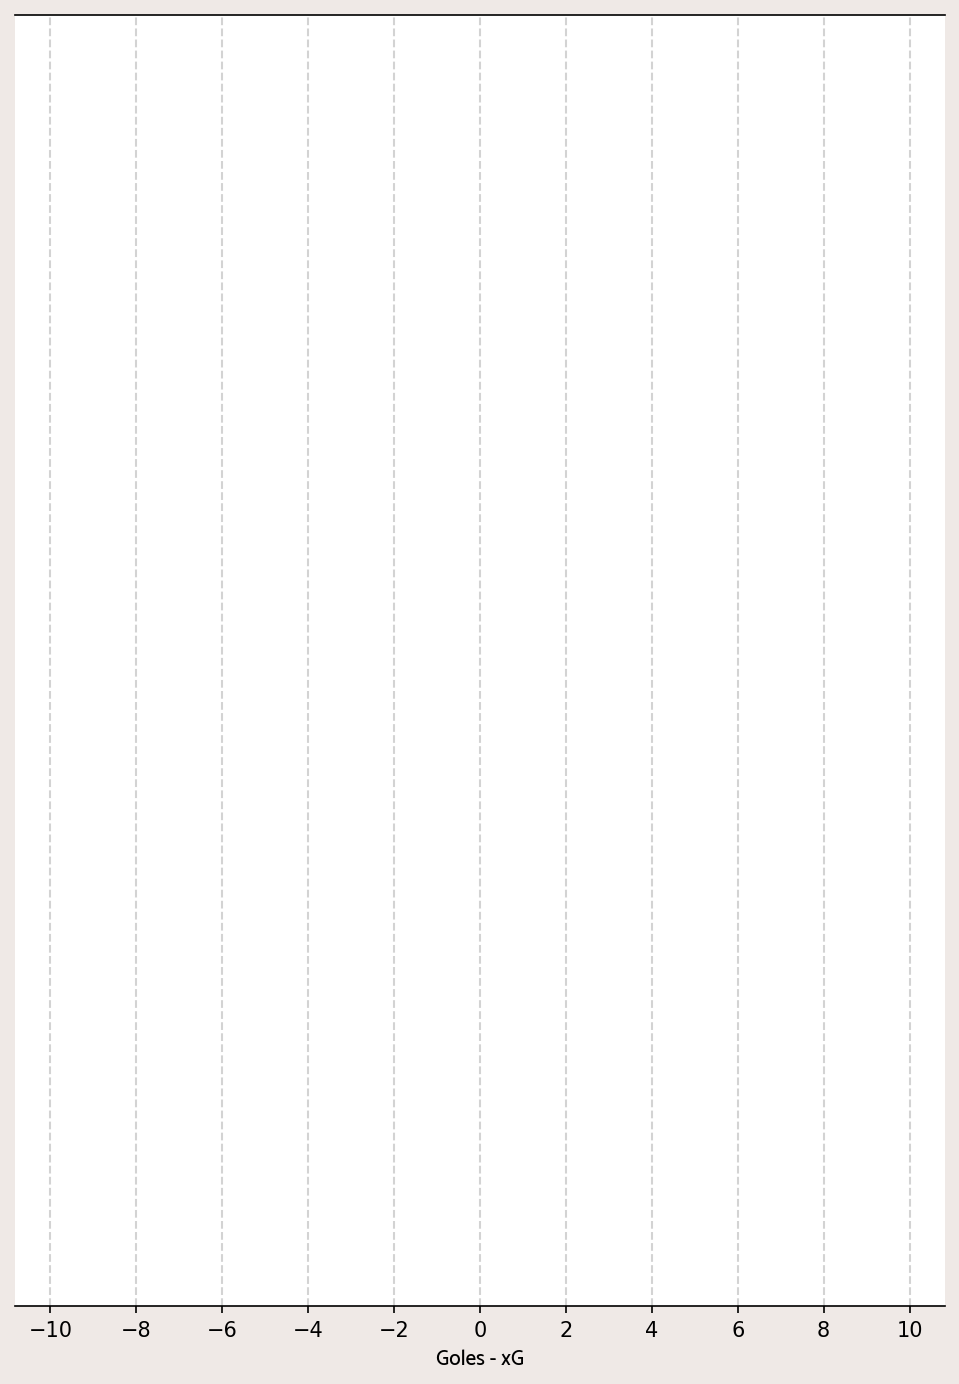

In [12]:
#Armo grid
fig = plt.figure(figsize=(8,11.4), dpi=150)
ax = plt.subplot()
fig.set_facecolor('#EFE9E6')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])

plt.rcParams['hatch.linewidth'] = 0.35

#Limites y ejes
max_ = max(abs(df_xGs['difference'].min()), df_xGs['difference'].max())
max_ = max_*(1.23)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df_xGs.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xlabel('Goles - xG', size=10, fontproperties=catamaran2.prop)


<BarContainer object of 28 artists>

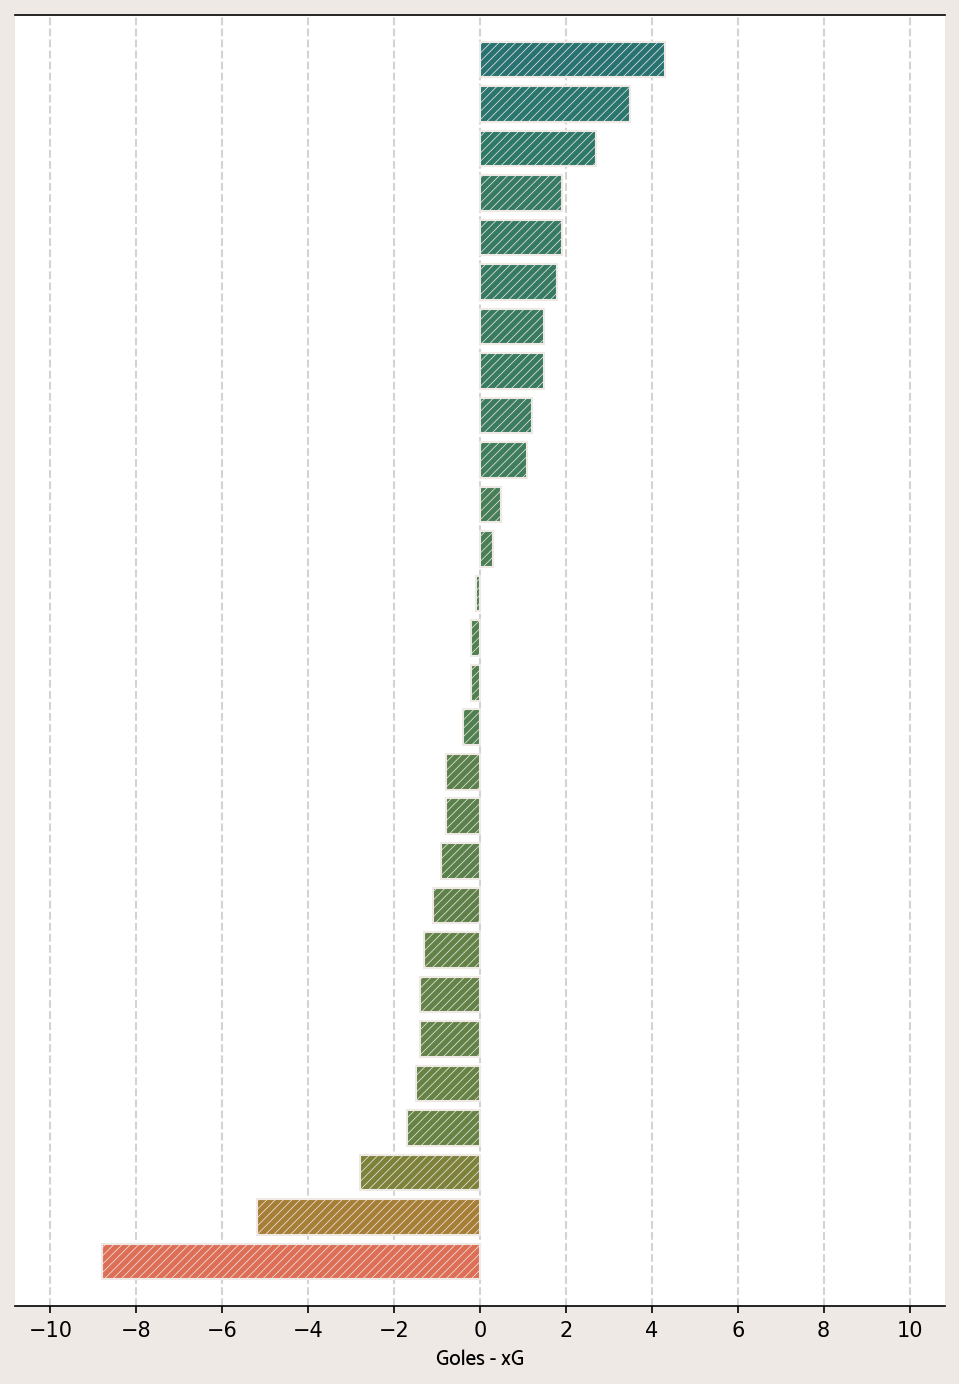

In [8]:
#Armo grid
fig = plt.figure(figsize=(8,11.4), dpi=150)
ax = plt.subplot()
fig.set_facecolor('#EFE9E6')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])

plt.rcParams['hatch.linewidth'] = 0.35

#Limites y ejes
max_ = max(abs(df_xGs['difference'].min()), df_xGs['difference'].max())
max_ = max_*(1.23)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df_xGs.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xlabel('Goles - xG', size=10, fontproperties=catamaran2.prop)

norm = mcolors.Normalize(vmin=df_xGs['difference'].min(),vmax=df_xGs['difference'].max())
cmap = plt.get_cmap('SOC')

ax.barh(
    df_xGs.index, df_xGs['difference'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(df_xGs['difference'])), #Se usa esto para primero generar el cmap (en este caso es custom y el norm hace que el degrade vaya mejor)
    zorder=3
)

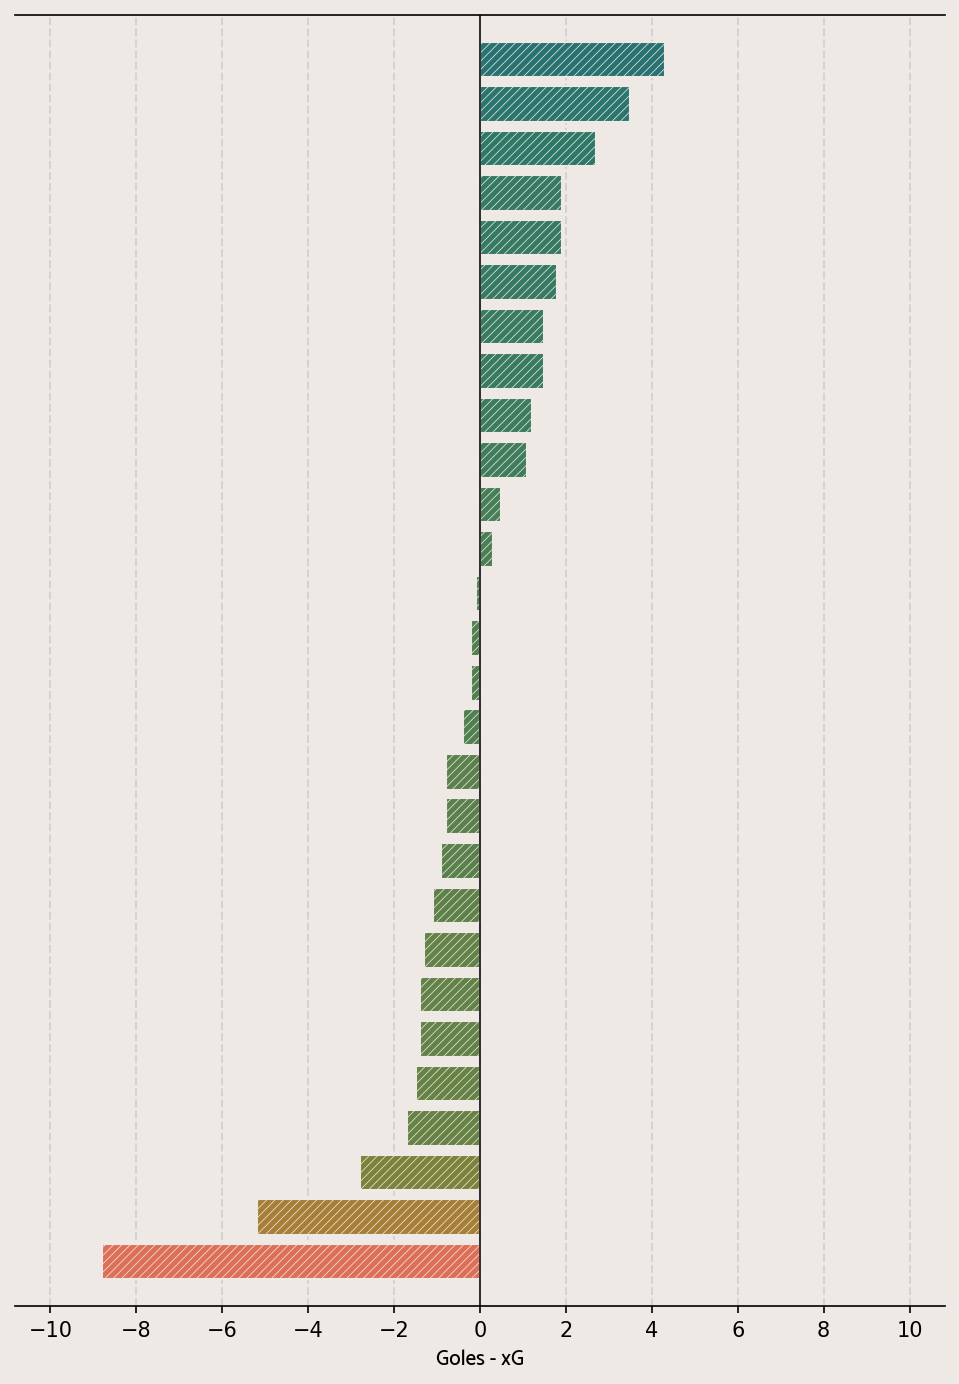

In [9]:
#Armo grid
fig = plt.figure(figsize=(8,11.4), dpi=150)
ax = plt.subplot()
fig.set_facecolor('#EFE9E6')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])

plt.rcParams['hatch.linewidth'] = 0.35

#Limites y ejes
max_ = max(abs(df_xGs['difference'].min()), df_xGs['difference'].max())
max_ = max_*(1.23)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df_xGs.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xlabel('Goles - xG', size=10, fontproperties=catamaran2.prop)

norm = mcolors.Normalize(vmin=df_xGs['difference'].min(),vmax=df_xGs['difference'].max())
cmap = plt.get_cmap('SOC')

ax.barh(
    df_xGs.index, df_xGs['difference'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(df_xGs['difference'])), #Se usa esto para primero generar el cmap (en este caso es custom y el norm hace que el degrade vaya mejor)
    zorder=3
)

ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
ax.set_facecolor('#EFE9E6')

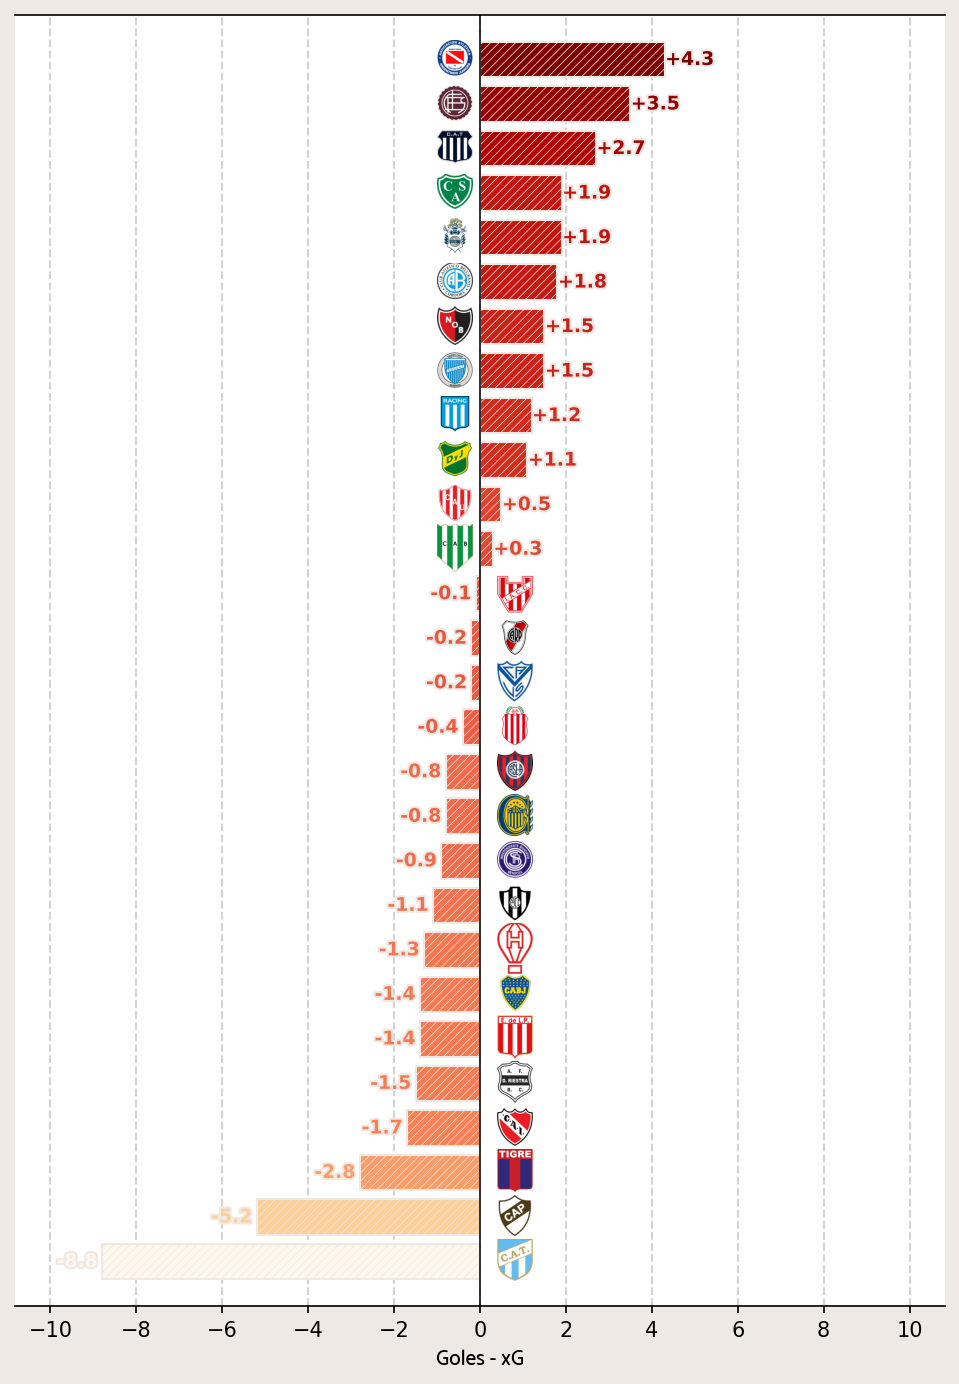

In [20]:
#Armo grid
fig = plt.figure(figsize=(8,11.4), dpi=150)
ax = plt.subplot()
fig.set_facecolor('#EFE9E6')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])

plt.rcParams['hatch.linewidth'] = 0.35

#Limites y ejes
max_ = max(abs(df_xGs['difference'].min()), df_xGs['difference'].max())
max_ = max_*(1.23)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df_xGs.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_xlabel('Goles - xG', size=10, fontproperties=catamaran2.prop)

norm = mcolors.Normalize(vmin=df_xGs['difference'].min(),vmax=df_xGs['difference'].max())
cmap = plt.get_cmap('OrRd')

ax.barh(
    df_xGs.index, df_xGs['difference'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(df_xGs['difference'])), #Se usa esto para primero generar el cmap (en este caso es custom y el norm hace que el degrade vaya mejor)
    zorder=3
)

ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

for index, x in enumerate(df_xGs['difference']):
    if x < 0:
        sign_offset = -1
        offset_logo = .4
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = 1
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*12,0),
        text=f'{sign_text}{x:.1f}',
        color= cmap(norm(x)),
        size=9,
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    # -- Add the logo
    team = df_xGs['name'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.55])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(team, logo_ax)

Text(0.13, 0.06, '*No se consideran los goles en contra ya que no suman xG.\nEstadísticas de la Copa de la Liga hasta la 10 por @FotMob.')

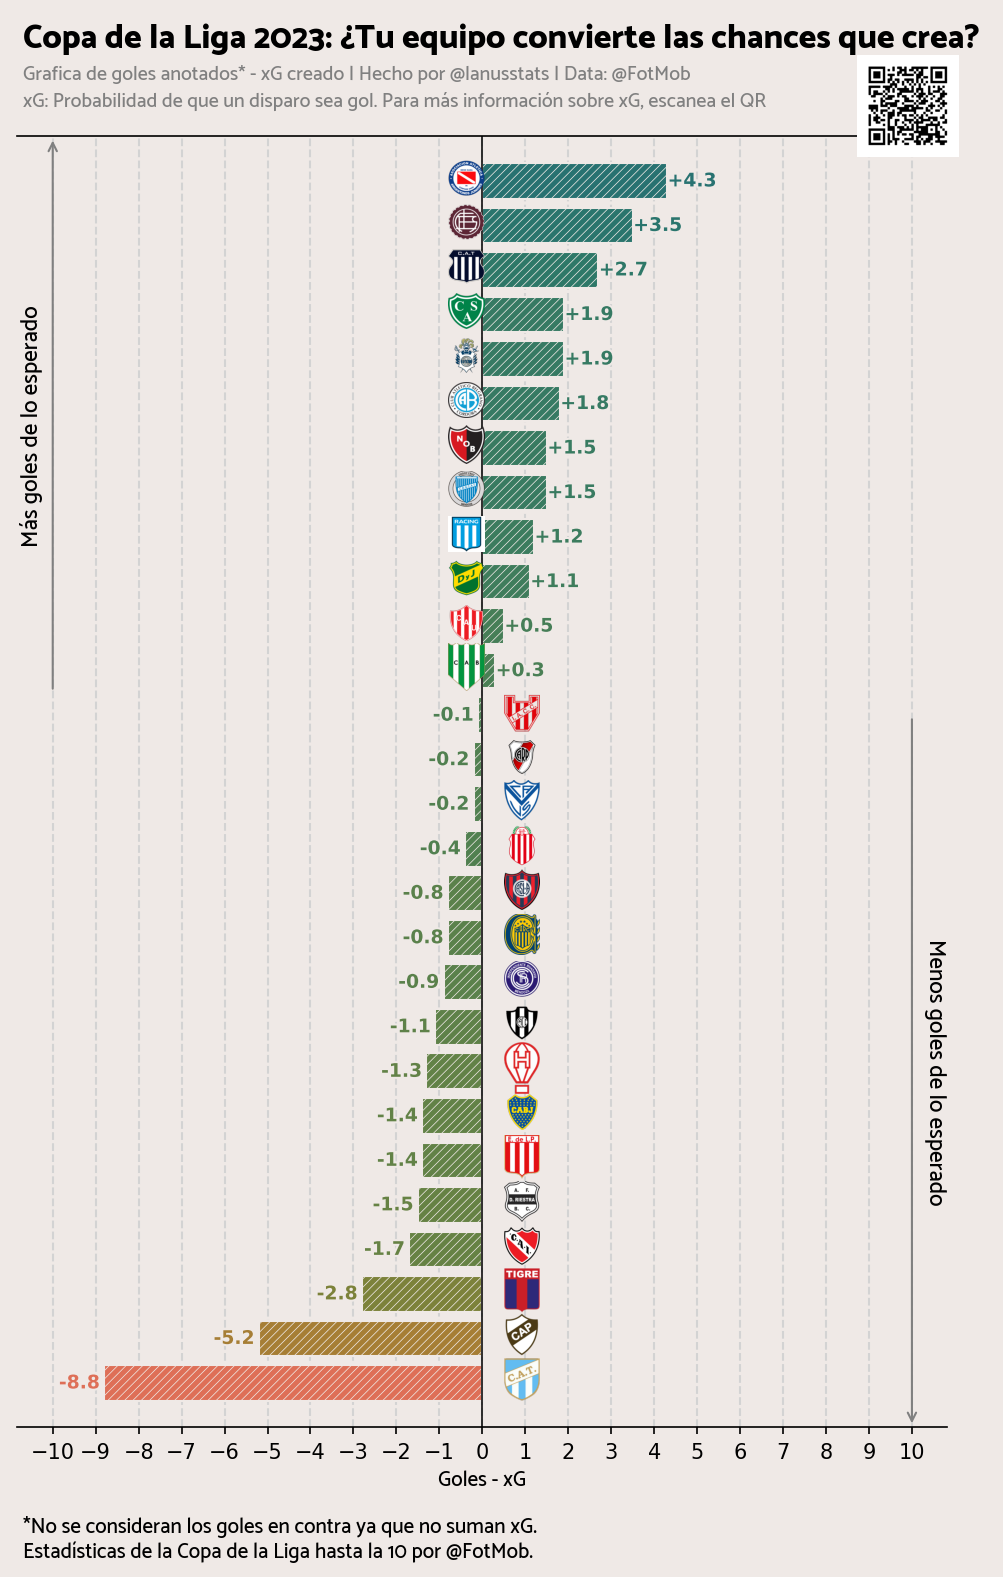

In [11]:
fig = plt.figure(figsize=(8,11.4), dpi=150)
ax = plt.subplot()
fig.set_facecolor('#EFE9E6')
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.35
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df_xGs['difference'].min()), df_xGs['difference'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.23)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df_xGs.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Goles - xG', size=10, fontproperties=catamaran2.prop)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=df_xGs['difference'].min(),vmax=df_xGs['difference'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    df_xGs.index, df_xGs['difference'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(df_xGs['difference'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
ax.set_facecolor('#EFE9E6')
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(df_xGs['difference']):
    if x < 0:
        sign_offset = -1
        offset_logo = .5
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = .8
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*12,0),
        text=f'{sign_text}{x:.1f}',
        color= cmap(norm(x)),
        size=9,
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    # -- Add the logo
    team = df_xGs['name'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(team, logo_ax)

# -- Figure title and arrows --------------------------------
position_negative = df_xGs[df_xGs['difference'] < 0].index.max()
position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))
ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2
ax.annotate(
    xy=(position_x_negative,mid_point_positive),
    text='Más goles de lo esperado',
    rotation=90,
    xytext=(-10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=11,
    fontproperties=catamaran2.prop
)
ax.annotate(
    xy=(position_x_positive,mid_point_negative),
    text='Menos goles de lo esperado',
    rotation=-90,
    xytext=(11,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=11,
    fontproperties=catamaran2.prop
)

fig_text(
    x = 0.13, y = .928, 
    s = 'Copa de la Liga 2023: ¿Tu equipo convierte las chances que crea?',
    va = 'bottom', ha = 'left',
    fontsize = 16, color = 'black', fontproperties=catamaran.prop
)

fig_text(
    x = 0.13, y = 0.895, 
    s = 'Grafica de goles anotados* - xG creado | Hecho por @lanusstats | Data: @FotMob \nxG: Probabilidad de que un disparo sea gol. Para más información sobre xG, escanea el QR',
    va = 'bottom', ha = 'left',
    fontsize = 9.5, color = 'gray', fontproperties=catamaran2.prop
)

logo_ax = fig.add_axes(
    [0.825, 0.855, .085, .085]
)
img = Image.open('/Users/Federico Rábanos/Downloads/frame.png')
logo_ax.imshow(img)
logo_ax.axis('off')
fig.text(
    x=.13, y=.06,
    s=f'*No se consideran los goles en contra ya que no suman xG.\nEstadísticas de la Copa de la Liga hasta la 10 por @FotMob.',
    ha='left',
    va='center',
    size=10,
    fontproperties = catamaran2.prop
)